# SUPERNOVA NEUTRINO DETECTION

The first step is to create our supernova, which will be done simply by determining the neutrino spectrum emitted by the supernova process. The neutrino emission spectrum follows an equation of the type

$$ \frac{dN}{dE} = A \frac{E^2}{1+e^{x - \eta}}$$

where $x = E/kT$ and $A= E_{tot}/T^4 f^3$, being $T$ the neutrino emission temperature, $E_{tot}$ is the total energy emitted by the supernova, $\eta$ is the neutrino degeneracy, which is equivalent to chemical potential in thermodynamics, finally $f^3$ is the Fermi's integral of 3rd order.

Let's start our detection by calling useful packages and defining the spectrum, for convinience let us choose $E_{tot} = 100$, $T=5$, $\eta = 1$ and $f = 0.6$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy import stats

#Here we define the range of variation for the energy E in MeVs

E = np.linspace(0, 80, 1000)

#Here we now define the "spec" function, representing the supernova spectrum

def spec(E, T, eta):
    fermi = 0.6
    Etot = 100
    A = Etot/((T**4)*fermi**3)
    k = 1
    return A*((E**2)/(1 + np.exp(E/(k*T)-eta)))

#An interesting thing to do, is to calculate the total number of neutrinos emitted in this process, given by
#the integral of spec over all energies

tot = simps(spec(E, 5, 1), E)
print('Total number of neutrinos emitted: ', tot)

Total number of neutrinos emitted:  400.7632188028079


Nice, now we proceed to create our detection spectrum, which is given by the multiplication of the supernova spectrum $dN/dE$ by the interaction cross-section of our detector $\sigma(E)$ and the efficiency $\varepsilon (E)$. However, for this demonstrative example we choose $\sigma = \varepsilon = 1$, that should make our work easier but not present any computational problem if we want to change $\sigma$ or $\varepsilon$ for any other function of $E$ in the future

In [2]:
def detec(E, T, eta):
    sigma = 1 #Cross-section
    epsilon = 1 #Detector efficiency
    Nt = 100 #Number of target particles in the detector
    d = 1.3 #Distance from supernova to the detector
    D = Nt/(4*np.pi*d**3)
    return spec(E, T, eta)*sigma*epsilon#*D

#It is useful to compute the total number of detected neutrinos, given by the integral of our "detec" function
#multiplied by a constant (D) that represents the homogeneous spread of neutrinos all over space, that is why
#we added it to the "detec" function already, but again, for simplicity we choose not to use it

s0 = simps(detec(E, 5, 1), E)
print('Expected events in the detector = %3.f' % s0)

Expected events in the detector = 401


How about a plot of this spectrum for a better look?

Text(0.5, 1.0, 'Neutrino emission spectrum by supernova')

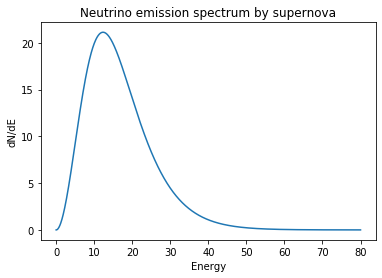

In [3]:
plt.plot(E, spec(E, 5, 1))
plt.xlabel('Energy')
plt.ylabel('dN/dE')
plt.title('Neutrino emission spectrum by supernova')

Sweet, we expect to detect 401 neutrinos in our detector. All of that seems wonderful, but the real world is not so organized and we must introduce a random fluctuations in our detection. That shall be acomplished by creating a poisson distribution centered at $s_0$, we then pick a random number from this distribution and assign it as our new number of detected neutrinos

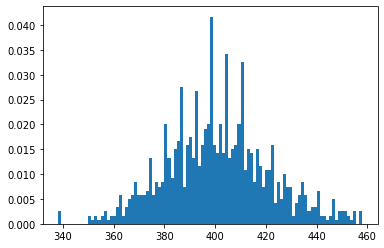

Number chosen = 409


In [4]:
poiss = np.random.poisson(s0, 1000)
count, bins, ignored = plt.hist(poiss, 100, density=True)
plt.show()
print('Number chosen = %3.f' % poiss[0])

#Lets make it our reference for all future analysis
ref = poiss[0]

Ok, so I expected $s_0$ neutrinos at my detector, however I got $ref$, such is life. How can I reconstruct the supernova spectrum from that? There are basically 3 parameters that determine a supernova spectrum for neutrinos, $E_{tot}$, $T$ and $\eta$. Luckly, $E_{tot}$ is fairly constant due to the Chandrasekhar's limit for the core mass of the star, therefore we can treat it as a constant value without large deviations from reality. We are now left with $T$ and $\eta$.

We could simply go with a loop that integrates the "detec" function for random pairs of $(T, \eta)$ and tell our loop to save those values that yield a integral equal to $ref$. Sadly there is a problem with that, several pairs of $(T, \eta)$ yield the same integral. Is like trying to figure out the true lenght $(L)$ and height $(H)$ of a rectangle having just it's area, if our area were 16, we could have $L = 16$ and $H = 1$, or maybe $L = 4$ and $H = 4$, or even $L = 3$ and $H = 5.33$, and so on...

It so happens that supernovas happen in a specific range of temperatures, therefore we can set a bound to our values of $T$. We'll proceed as following: we determine the range of validity for our $T$ and $\eta$ and create a simple loop to go trought all the values inside this range and save the integral given by each pair $(T, \eta)$. Then, we take the region close to our $ref$ and perform a Kolmogorov-Smirnov (KS) test on the distributions generated by the remaining pairs. The ones with a lower KS-statistic should probabily be our real $T$ and $\eta$ for the supernova

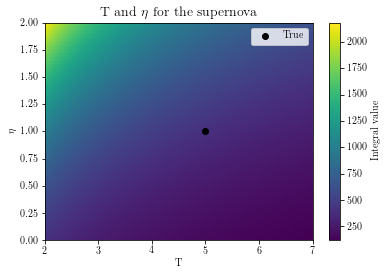

In [8]:
#Setting T, eta, and S (result of the integral) as empty arrays
T2 = []
eta2 = []
S = []

#Loop for calculating the integral with Ts and etas

for i in range(1000000):
    T0 = np.random.uniform(2,7)
    eta0 = np.random.uniform(0,2)
    S2 = simps(detec(E, T0, eta0), E)

    T2.append(T0)
    eta2.append(eta0)
    S.append(S2)
    
#Ploting the result

plt.rc('text', usetex = True)
plt.rc('font', family ='serif')
cs = plt.hexbin(T2, eta2, C=S, gridsize=100, cmap='viridis', bins=None)
plt.colorbar(cs, label = 'Integral value')
plt.scatter(5, 1, color = 'black', label = 'True')
plt.xlabel('T')
plt.ylabel(r'$\eta$')
plt.xlim(2, 7)
plt.ylim(0, 2)
plt.title(r'T and $\eta$ for the supernova', fontsize = 14)
plt.legend()

Ok, we may narrow down or search range with the KS test to a region of $T$ between 4.5 and 5.5, and $\eta$ between 0.75 and 1.25

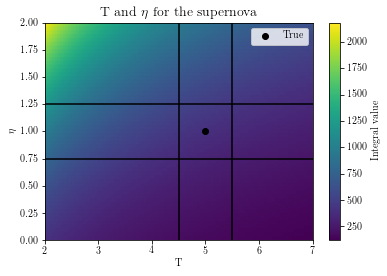

In [15]:
plt.rc('text', usetex = True)
plt.rc('font', family ='serif')
cs = plt.hexbin(T2, eta2, C=S, gridsize=100, cmap='viridis', bins=None)
plt.colorbar(cs, label = 'Integral value')
plt.scatter(5, 1, color = 'black', label = 'True')
plt.xlabel('T')
plt.ylabel(r'$\eta$')
plt.xlim(2, 7)
plt.ylim(0, 2)
plt.vlines(4.5, 0, 2, color = 'black')
plt.vlines(5.5, 0, 2, color = 'black')
plt.hlines(0.75, 1, 7, color = 'black')
plt.hlines(1.25, 1, 7, color = 'black')
plt.title(r'T and $\eta$ for the supernova', fontsize = 14)
plt.legend()

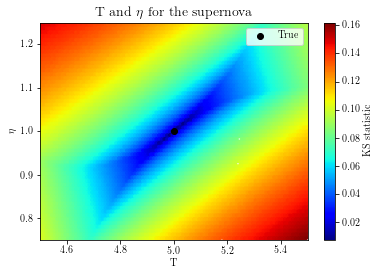

In [26]:
#We define new T and eta as an empty array
T3 = []
eta3 = []
KS = []

for i in range(100000):
    T0 = np.random.uniform(4.5,5.5)
    eta0 = np.random.uniform(0.75,1.25)
    K = stats.ks_2samp(detec(E, T0, eta0), detec(E, 5, 1))

    T3.append(T0)
    eta3.append(eta0)
    KS.append(K[0])

#Plot of the result
    
plt.rc('text', usetex = True)
plt.rc('font', family ='serif')
cs = plt.hexbin(T3, eta3, C=KS, gridsize=100, cmap=plt.cm.jet, bins=None)
plt.colorbar(cs, label = 'KS statistic')
plt.scatter(5, 1, color = 'black', label = 'True')
plt.xlabel('T')
plt.ylabel(r'$\eta$')
plt.xlim(4.5, 5.5)
plt.ylim(0.75, 1.25)
plt.title(r'T and $\eta$ for the supernova', fontsize = 14)
plt.legend()